# Initial data exploration

Kaggle data link: https://www.kaggle.com/datasets/harunshimanto/epileptic-seizure-recognition/data

In [1]:
import os
from pathlib import Path


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pwd

/home/jovana/code/y01a-BG/NeuroPredict


## Data import from locally downloaded file

In [3]:
data = pd.read_csv("/home/jovana/code/y01a-BG/NeuroPredict/raw_data/Epileptic Seizure Recognition.csv")

In [4]:
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


# Data Preprocessing

## Excluding a column with unneeded info

In [5]:
data.drop(columns=['Unnamed'], inplace=True) 


In [6]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


## Leaving only data that are meaningful for NeuroPredict

In [7]:
# based on Kaggle description, I want to use only 1,2,3
data.y.value_counts()

y
4    2300
1    2300
5    2300
2    2300
3    2300
Name: count, dtype: int64

In [8]:
df = data[~data['y'].isin([4, 5])]

In [9]:
df.y.value_counts()

y
1    2300
2    2300
3    2300
Name: count, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6900 entries, 1 to 11498
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 9.5 MB


## Plotting some data examples

##  Separating X, y

In [11]:
X = df.drop(columns = 'y')
y = df.y

In [12]:
X,y

(        X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X169  X170  \
 1      386  382  356  331  320  315  307  272  244  232  ...   168   164   
 7        1   -2   -8  -11  -12  -17  -15  -16  -18  -17  ...   -67   -79   
 8     -278 -246 -215 -191 -177 -167 -157 -139 -118  -92  ...  -386  -400   
 11    -167 -230 -280 -315 -338 -369 -405 -392 -298 -140  ...   415   423   
 12      92   49    0  -32  -51  -65  -37  -19  -25  -29  ...   -80   -56   
 ...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
 11493 -136 -137 -138 -135 -130 -123 -116 -118 -119 -119  ...   -11    -1   
 11494  -39  -16  -13  -14  -68  -84  -92  -61  -89  -86  ...   -88  -102   
 11495  -22  -22  -23  -26  -36  -42  -45  -42  -45  -49  ...    20    15   
 11496  -47  -11   28   77  141  211  246  240  193  136  ...   -94   -65   
 11498  -40  -25   -9  -12   -2   12    7   19   22   29  ...   114   121   
 
        X171  X172  X173  X174  X175  X176  X177  X178  
 1       150   14

In [13]:
X.isna().sum()

X1      0
X2      0
X3      0
X4      0
X5      0
       ..
X174    0
X175    0
X176    0
X177    0
X178    0
Length: 178, dtype: int64

## Re-shaping X for import to model

In [14]:
import numpy as np 
X_pad = np.expand_dims(X, axis=2)
X_pad.shape

(6900, 178, 1)

## Test and train data split


In [15]:
from sklearn.model_selection import train_test_split
# Split the data into 80% train and 20% test, with random_state=42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

In [16]:
X_train.shape, y_test.shape

((5520, 178, 1), (1380,))

# LSTM model 

In [17]:
# What version of Tensorflow do you have ?
!pip freeze | grep tensorflow

tensorflow==2.10.0
tensorflow-estimator==2.10.0
tensorflow-io-gcs-filesystem==0.37.1


In [18]:
import tensorflow as tf
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import LSTM, Dense, Dropout

2025-03-18 14:07:09.196759: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-18 14:07:09.543423: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-18 14:07:09.625431: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-03-18 14:07:09.625456: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not ha

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/home/jovana/.pyenv/versions/3.10.6/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/jovana/.pyenv/versions/3.10.6/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/jovana/.pyenv/versions/3.10.6/envs/NeuroPredict/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/jovana/.pyenv/versions/3.10.6/envs/NeuroPredict/lib/python3.10/site-packages/t

AttributeError: _ARRAY_API not found

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [19]:
import tensorflow as tf
print(tf.__version__)

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [ ]:

import sys
print(sys.version) 
!python --version
!pip uninstall tensorflow tensorflow-gpu tensorflow-intel keras protobuf -y

In [ ]:
!rm -rf ~/.keras ~/.tensorflow ~/.cache/pip

In [ ]:
!pip install tensorflow==2.10

In [ ]:
!pip list | grep tensorflow

In [ ]:
model = Sequential([
    LSTM(128, activation='relu', return_sequences=True, input_shape=(178,1)),
    LSTM(128, activation='relu', return_sequences=True),
    LSTM(64, activation='relu', return_sequences=True),
    LSTM(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

### Some examples

/tmp/ipykernel_96796/2816531577.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap


KeyError: np.int64(0)

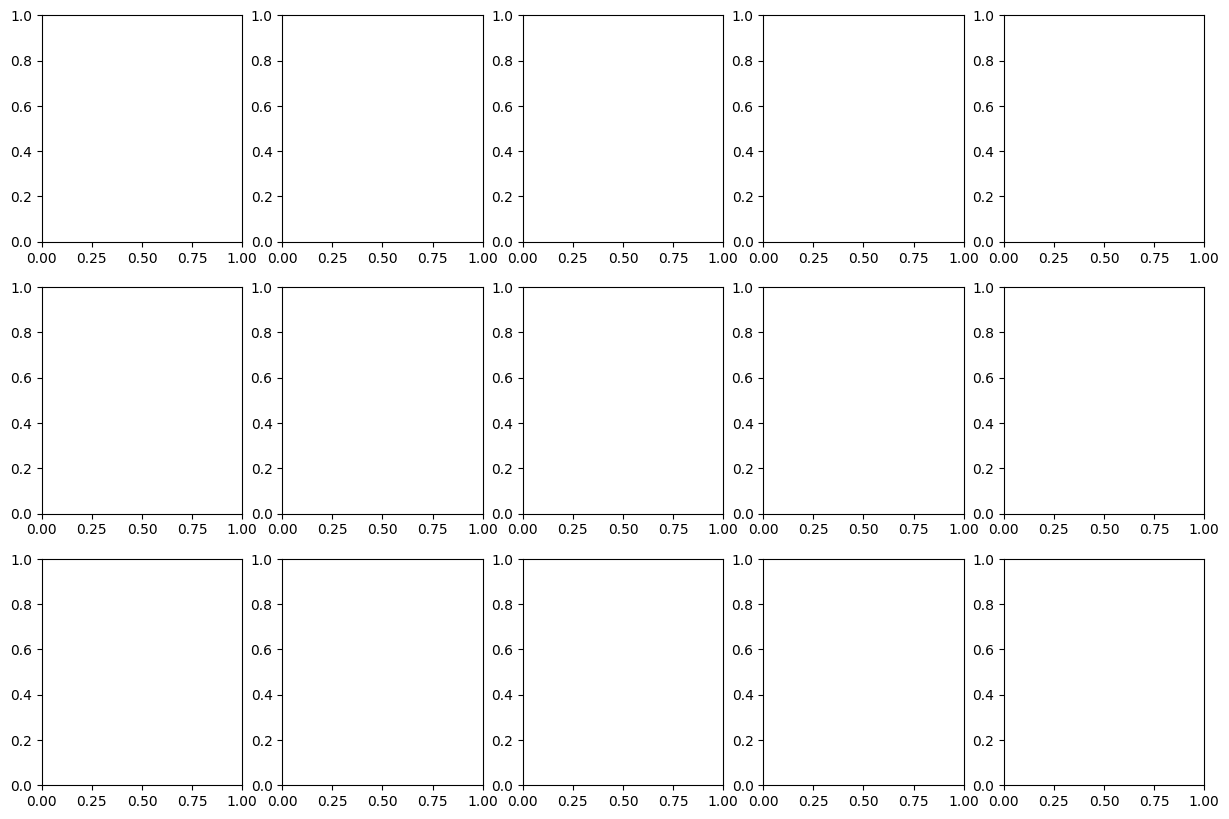

In [20]:

import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# ------------------------- #
#      Some colormaps       #
# ------------------------- #

name = "tab20c"
cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
colors_list = cmap.colors


# ------------------------- #
#      Some ECG             #
# ------------------------- #
unique_cathegory = y.unique()
fix, axs = plt.subplots(3,5, figsize=(15,10))

for i in range(5): # Five examples per category
    for j in unique_cathegory: # Iterating over the 3 categories
        idx_C = np.argwhere(np.array(y) == j)  # Collecting the indexes of all the heartbeats of category j
        axs[i,j].plot(X[idx_C[i][0]], label=f'Category {j}', c=colors_list[j+3]) # Plotting the ECG
        # Some cosmetic tricks down below
        if i == 0:
            axs[i,j].legend(loc='upper center')
            if j ==0:
                axs[i,j].set_xlabel('Time')
                axs[i,j].set_ylabel('ECG Amplitude')